In [102]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'darkgrid')


In [103]:
# Read the csv file

data = pd.read_csv('Loan_Data.csv')
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [104]:
# Copy Original data before processing

df = data.copy()

In [105]:
# Check for missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
# Handling missing values

for i in df.columns:
    if (df[i].isnull().sum()/ len(df)).round(2) * 100 < 30:  
        if df[i].dtypes != 'O':                 
            df[i].fillna(df[i].median(), inplace = True)
        else:
            df[i].fillna(df[i].mode()[0], inplace = True)

In [107]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


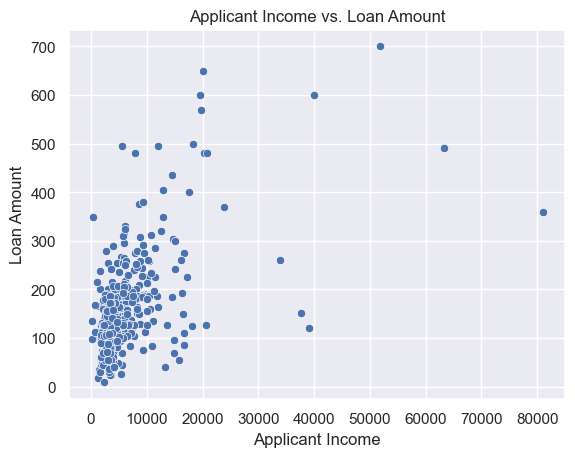

In [112]:
# Scatter plot to visualize the relationship between Applicant Income and Loan Amount.

sns.scatterplot( data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# This scatterplot shows a positive correlation suggesting a tendency for loan amounts to rise with increasing applicant income although with some variability.

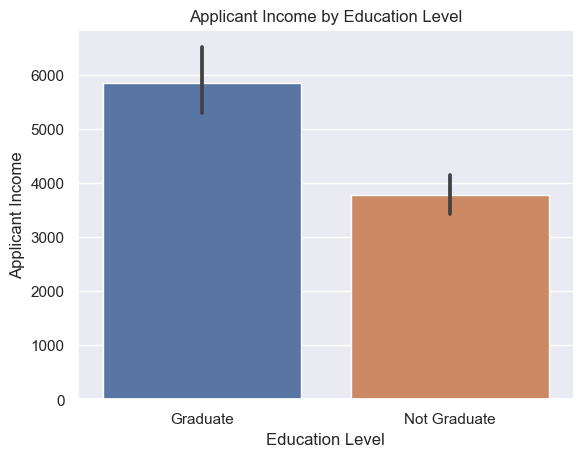

In [116]:
# Bar Chart to visualize applicant income by education level

sns.barplot(data=df, x='Education', y='ApplicantIncome')
plt.title('Applicant Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Applicant Income')
plt.show()

# The bar chart confirms that graduates tend to earn significantly more on average than non-graduates.

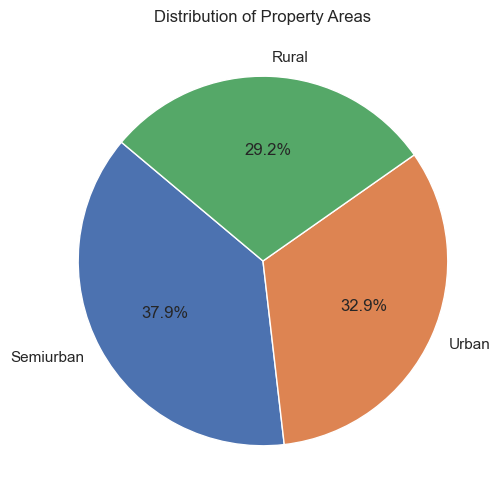

In [118]:
# Count the occurrences of each category in Property_Area
property_area_counts = df['Property_Area'].value_counts()

# Pie Chart for Property Area Distribution
plt.figure(figsize=(8, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Areas')
plt.show()

In [131]:
cats = df.select_dtypes(exclude = 'number')
nums = df.select_dtypes(include = 'number')

print('Categorical Dataset')
display(cats.head())
print(f'\n\nNumerical Dataset')
display(nums.head())


Categorical Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y




Numerical Dataset


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [138]:
# Distribution of all categorical variable based on the Loan Status 

def plotter(dataframe, a,b,c,d,e):
        plt.figure(figsize = (20, 4))
        plt.subplot(1, 5, 1)
        sns.countplot(data = dataframe, x = dataframe[a], hue='Loan_Status', palette = 'Set2')
        plt.title(f'Distribution of {a} by Loan Status')

        plt.subplot(1, 5, 2)
        sns.countplot(data = dataframe, x = dataframe[b], hue='Loan_Status', palette = 'husl')
        plt.title(f'Distribution of {b} by Loan Status')

        plt.subplot(1, 5, 3)
        sns.countplot(data = dataframe, x = dataframe[c], hue='Loan_Status', palette = 'rainbow')
        plt.title(f'Distribution of {c} by Loan Status')

        plt.subplot(1, 5, 4)
        sns.countplot(data = dataframe, x = dataframe[d],hue='Loan_Status', palette = 'BuPu')
        plt.title(f'Distribution of {d} by Loan Status')

        plt.subplot(1, 5, 5)
        sns.countplot(data = dataframe, x = dataframe[e], hue='Loan_Status', palette = 'PuOr')
        plt.title(f'Distribution of {e} by Loan Status')

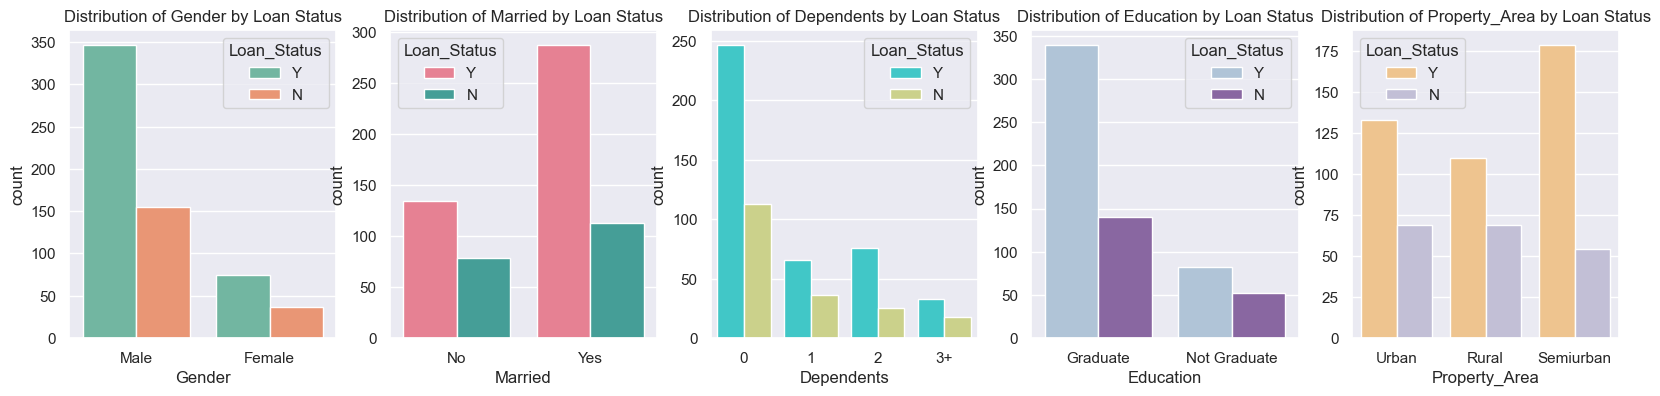

In [139]:
plotter(df, 'Gender','Married','Dependents','Education','Property_Area')